# Task definition

1.	Apply the logistic regression method using the functions in the notebook «Logistic Regression as a Neural Network – BP alg.ipynb” to predict the biological response of a molecule 
data: bioresponse.csv, 
description from Kaggle: “The data is in the comma separated values (CSV) format. Each row in this data set represents a molecule. The first column cont|ains experimental data describing a real biological response; the molecule was seen to elicit this response (1), or not (0). The remaining columns represent molecular descriptors (d1 through d1776), these are caclulated properties that can capture some of the characteristics of the molecule - for example size, shape, or elemental constitution. The descriptor matrix has been normalized.”). 
Use 75% of the dataset to train the model, and the rest of the data to estimate its accuracy.
2.	Modify optimize() function to implement the stochastic gradient descent (SGD) method. Apply it to solve the problem from p.1.
3.	For two modifications of gradient descent (pp. 1 and 2), plot the learning curves (dependence of the value of the loss function on the iteration number), apply models with different values of the learning rate (at least 5 different learning rates). How does it affect the accuracy of the model? 
4.	Implement the Adam optimization method using the numpy library and compare the accuracy of the model fitted with it with the models trained by the classic GD and SGD algorithms.


[ 1. Gradient Desent](#1--gd) 

[ 2. SGD](#2--sgd)

[ 3. Adam](#3--Adam)

[ 4. Methods comparing](#4--Methods comparing) 

# Logistic Regression as a Neural Network 
(partly following deeplearning.ai lab)

    - Initializing parameters
    - Calculating the cost function and its gradient
    - Using an optimization algorithm (gradient descent) 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

## General Architecture of the algorithm ##


Build a Logistic Regression, using a Neural Network mindset.

**Logistic Regression is actually a very simple Neural Network!**


**Mathematical expression of the algorithm**:

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})$$

**Key steps**:
    - Initialize the parameters of the model
    - Learn the parameters for the model by minimizing the cost  
    - Use the learned parameters to make predictions (on the test set)
    - Analyse the results and conclude

## Parts of our algorithm ## 

The main steps for building a Neural Network are:
1. Define the model structure (such as number of input features, number of layers, number of neurons in the layer etc.) 
2. Initialize the model's parameters
3. Loop:
    - Calculate current loss (forward propagation)
    - Calculate current gradient (backward propagation)
    - Update parameters (gradient descent)

Build 1-3 separately and integrate them into one function we call `model()`.

### Sigmoid

$sigmoid( w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$ 

In [2]:
# sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    s = 1./(1.+np.exp(-z))
    
    return s

In [3]:
print ("sigmoid([0, 2, 10, -10]) = " + str(sigmoid(np.array([0., 2., -2., 100.]))))

sigmoid([0, 2, 10, -10]) = [0.5        0.88079708 0.11920292 1.        ]


### Initializing parameters



In [4]:
# initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    w = np.zeros((dim,1))
    b = 0.
    
    return w, b

In [5]:
dim = 3
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]
 [0.]]
b = 0.0


### Forward and Backward propagation

Implement a function `propagate()` that computes the cost function and its gradient.

Forward Propagation:
- You get X
- You compute $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

Here are the two formulas we should use: 

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})$$

In [77]:
# propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size which equals the number of features
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    """
    m = X.shape[1]
    #print('number of objects = ',len(X))
    
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T,X)+b )                                 # compute activation
    cost = -(1./m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A),axis=1)   # compute cost
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = (1./m)*np.dot(X,(A-Y).T)
    db = (1./m)*np.sum(A-Y,axis=1)

    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [78]:
w, b, X, Y = np.array([[1.],[-1.]]), 4., np.array([[1.,5.,-1.],[10.,0.,-3.2]]), np.array([[0,1,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.0027004 ]
 [0.02446984]]
db = [0.00151471]
cost = [0.00295537]


### Optimization
- We have initialized the parameters.
- We are able to compute a cost function and its gradient.
- Now, we have to update the parameters using gradient descent.

For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha \text{ } d\theta$, where $\alpha$ is the learning rate.

In [290]:
# optimize

def optimize_sgd(w, b, X, Y, num_iterations, learning_rate, print_cost = False, batch_size = 50):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    """
    
    costs = []
    
    for i in range(num_iterations):
                
        # Cost and gradient calculation 
        np.random.seed = 0
        rand_v = np.random.randint(0,len(Y[0]), len(Y[0]))
        np.random.shuffle(rand_v)
       # print("rand: ", rand_v)
       # print("X:", X[:,rand_v-1:rand_v])
      #  print("Y:", Y[:,rand_v-1:rand_v])
        grads, cost = propagate(w,b,X[:,rand_v[:batch_size]],Y[:,rand_v[:batch_size]])
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule
        w -=learning_rate*dw
        b -=learning_rate*db
        
        print(w)
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs



def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    """
    
    costs = []
    
    for i in range(num_iterations):
                
        # Cost and gradient calculation 
     
       # print("rand: ", rand_v)
       # print("X:", X[:,rand_v-1:rand_v])
      #  print("Y:", Y[:,rand_v-1:rand_v])
        grads, cost = propagate(w,b,X,Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule
        w -=learning_rate*dw
        b -=learning_rate*db
        
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [315]:
def optimize_adam(w, b, X, Y, num_iterations, learning_rate = 0.01, print_cost = False,  beta1=0.9, beta2=0.999, epsilon=1e-8):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    """
    
    costs = []
    m_dw, v_dw = np.zeros(w.shape[1]),np.zeros(w.shape[1])
    m_db, v_db =  np.zeros(w.shape[1]), np.zeros(w.shape[1])
    
   # m_dw, v_dw = 0,0
  #  m_db, v_db = 0,0
    
    for i in range(1,num_iterations):
                
        # Cost and gradient calculation 
     
       # print("rand: ", rand_v)
       # print("X:", X[:,rand_v-1:rand_v])
      #  print("Y:", Y[:,rand_v-1:rand_v])
       
        grads, cost = propagate(w,b,X,Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
      
        m_dw = beta1*m_dw + (1-beta1)*dw
      #  print(m_dw)
        # *** biases *** #
        m_db = beta1*m_db + (1-beta1)*db

        ## rms beta 2
        # *** weights *** #
        v_dw = beta2*v_dw + (1-beta2)*(dw**2)
       # print(v_dw)
        # *** biases *** #
        v_db = beta2*v_db + (1-beta2)*(db**2)

        ## bias correction
        m_dw_corr = m_dw/(1-beta1**i)
        m_db_corr = m_db/(1-beta1**i)
        v_dw_corr = v_dw/(1-beta2**i)
        v_db_corr = v_db/(1-beta2**i)

        
        ## update weights and biases
        w -=  learning_rate*(m_dw_corr/(np.sqrt(v_dw_corr)+epsilon))
        b -=  learning_rate*(m_db_corr/(np.sqrt(v_db_corr)+epsilon))
        
       
#         # update rule
#         w -=learning_rate*dw
#         b -=learning_rate*db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs 

In [245]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 1000, learning_rate = 0.005, print_cost = True)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

ValueError: shapes (1,2) and (200,2) not aligned: 2 (dim 1) != 200 (dim 0)

Implement the `predict()` function. There are two steps to compute predictions:

1. Calculate $\hat{Y} = A = \sigma(w^T X + b)$

2. Convert the entries of A into 0 (if activation <= 0.5) or 1 (if activation > 0.5), store the predictions in a vector `Y_prediction`. 

In [246]:
# predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities 
    A = sigmoid(np.dot(w.T,X)+b)
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if (A[0,i]<=0.5):
            Y_prediction[0][i]=0
        else:
            Y_prediction[0][i]=1
    
    return Y_prediction

In [203]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1. 0.]]



Already have:
- Initialize (w,b)
- Optimize the loss iteratively to learn parameters (w,b):
    - computing the cost and its gradient 
    - updating the parameters using gradient descent
- Use the learned (w,b) to predict the labels for a given set of examples

## Merge it all into a model ##

    - Y_prediction_test for the predictions on the test set
    - Y_prediction_train for the predictions on the train set
    - w, costs, grads for the outputs of optimize()

In [229]:
# model

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False, method = "GD", batch_size = 50):
    """
    Builds the logistic regression model by calling the function we've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array 
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array 
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    # initialize parameters with zeros 
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent
    if method == "GD":
        parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    elif method == "SGD":
        parameters, grads, costs = optimize_sgd(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost, batch_size = 50)
    elif method == "Adam":
        parameters, grads, costs = optimize_adam(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
        print(grads)
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [230]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
X, y = datasets.make_moons(200, noise=0.20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Import data

In [253]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [254]:
data = pd.read_csv("bioresponse.csv").values

In [255]:
y = data[:,0]
X = data[:,1:]

X.shape

(3751, 1776)

In [257]:
from sklearn.model_selection import train_test_split

In [258]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [260]:
X_test.shape

(938, 1776)

<h3 id="1--gd">1. Gradient desent</h3>

In [261]:
lgo_model_005 = model(X_train.T,y_train.reshape(1,-1), X_test.T, y_test.reshape(1,-1), learning_rate = 0.05 ).copy()
lgo_model_001 = model(X_train.T,y_train.reshape(1,-1), X_test.T, y_test.reshape(1,-1), learning_rate = 0.01 ).copy()
lgo_model_0005 = model(X_train.T,y_train.reshape(1,-1), X_test.T, y_test.reshape(1,-1), learning_rate = 0.005 ).copy()
lgo_model_05 = model(X_train.T,y_train.reshape(1,-1), X_test.T, y_test.reshape(1,-1), learning_rate = 0.5 ).copy()
lgo_model_01 = model(X_train.T,y_train.reshape(1,-1), X_test.T, y_test.reshape(1,-1), learning_rate = 0.1 ).copy()

train accuracy: 82.26093138997511 %
test accuracy: 76.97228144989339 %
train accuracy: 78.35051546391753 %
test accuracy: 75.5863539445629 %
train accuracy: 77.10629221471739 %
test accuracy: 74.73347547974413 %
train accuracy: 83.82509776039815 %
test accuracy: 72.92110874200426 %
train accuracy: 83.32740846071809 %
test accuracy: 76.43923240938166 %


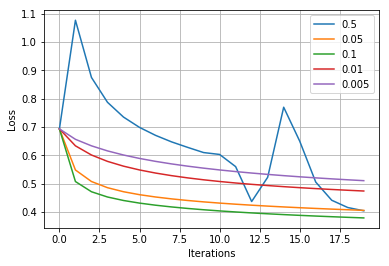

In [226]:
plt.plot(np.asarray(lgo_model_05['costs']).ravel(), label = "0.5")
plt.plot(np.asarray(lgo_model_005['costs']).ravel(), label = "0.05")
plt.plot(np.asarray(lgo_model_01['costs']).ravel(), label = "0.1")
plt.plot(np.asarray(lgo_model_001['costs']).ravel(), label = "0.01")
plt.plot(np.asarray(lgo_model_0005['costs']).ravel(), label = "0.005")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid()
plt.legend()

<h3 id="2--sgd">2. Stohastic Gradient Desent</h3>

In [268]:
lgo_model_sgd_05 = model(X_train.T,y_train.reshape(1,-1), 
                         X_test.T, y_test.reshape(1,-1), method = "SGD", learning_rate = 0.5, batch_size = 200 ).copy()
lgo_model_sgd_005 = model(X_train.T,y_train.reshape(1,-1), 
                         X_test.T, y_test.reshape(1,-1), method = "SGD", learning_rate = 0.05 , batch_size = 200).copy()
lgo_model_sgd_01 = model(X_train.T,y_train.reshape(1,-1), 
                         X_test.T, y_test.reshape(1,-1), method = "SGD", learning_rate = 0.1 , batch_size = 200).copy()
lgo_model_sgd_001 = model(X_train.T,y_train.reshape(1,-1), 
                         X_test.T, y_test.reshape(1,-1), method = "SGD", learning_rate = 0.01 , batch_size = 200).copy()
lgo_model_sgd_0005 = model(X_train.T,y_train.reshape(1,-1), 
                         X_test.T, y_test.reshape(1,-1), method = "SGD", learning_rate = 0.005 , batch_size = 200).copy()

train accuracy: 67.01030927835052 %
test accuracy: 67.91044776119404 %
train accuracy: 82.26093138997511 %
test accuracy: 76.75906183368869 %
train accuracy: 82.33202986135798 %
test accuracy: 75.5863539445629 %
train accuracy: 78.56381087806612 %
test accuracy: 74.94669509594883 %
train accuracy: 76.71525062211163 %
test accuracy: 74.52025586353945 %


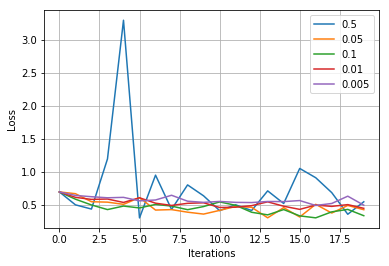

In [225]:
plt.plot(np.asarray(lgo_model_sgd_05['costs']).ravel(), label = "0.5")
plt.plot(np.asarray(lgo_model_sgd_005['costs']).ravel(), label = "0.05")
plt.plot(np.asarray(lgo_model_sgd_01['costs']).ravel(), label = "0.1")
plt.plot(np.asarray(lgo_model_sgd_001['costs']).ravel(), label = "0.01")
plt.plot(np.asarray(lgo_model_sgd_0005['costs']).ravel(), label = "0.005")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid()
plt.legend()

<h3 id="3--adam">3. Adam</h3>

In [322]:
lgo_model_adam_005 = model(X_train.T,y_train.reshape(1,-1), X_test.T, y_test.reshape(1,-1), learning_rate = 0.005, method = "Adam").copy()


C:\Users\Zoya\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log
C:\Users\Zoya\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in multiply


{'dw': array([[ 1.28397792e-05],
       [-2.39002545e-05],
       [-1.03949352e-06],
       ...,
       [-2.49134217e-07],
       [-3.97979015e-06],
       [-3.72880016e-06]]), 'db': array([-1.82497255e-05])}
train accuracy: 94.02772840383932 %
test accuracy: 73.56076759061834 %


<h3 id="2--sgd">4. Methods comparing (Adam VS GD VS SGD)</h3> 

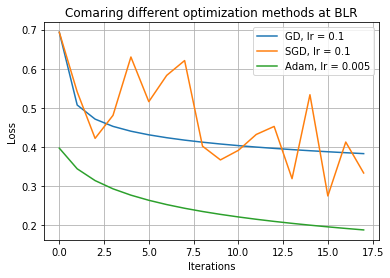

In [329]:
plt.plot(np.asarray(lgo_model_01['costs']).ravel()[:-2], label = "GD, lr = 0.1")
plt.plot(np.asarray(lgo_model_sgd_01['costs']).ravel()[:-2], label = "SGD, lr = 0.1")
plt.plot(np.asarray(lgo_model_adam_0005['costs']).ravel(), label = "Adam, lr = 0.005")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Comaring different optimization methods at BLR")
plt.grid()
plt.legend()